In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

### 1. Define DCT and inverse DCT

In [2]:
def C_func(x):
    if x == 0:
        return np.sqrt(2)/2
    else:
        return 1

In [3]:
def DCT_2D(f, M=8, N=8):
    F = np.zeros([M, N])
    for u in range(M):
        for v in range(N):
            temp = 0
            for i in range(M):
                for j in range(N):
                    temp += np.cos(((2*i+1)*u*np.pi)/(2*M)) * np.cos(((2*j+1)*v*np.pi)/(2*N)) * f[i, j]
            F[u, v] = temp * 2 * C_func(u) * C_func(v) / np.sqrt(M * N)
    
    return F

In [4]:
def IDCT_2D(F, M=8, N=8):
    f = np.zeros([M, N])
    for i in range(M):
        for j in range(N):
            temp = 0
            for u in range(M):
                for v in range(N):
                    temp += (2 * C_func(u) * C_func(v) / np.sqrt(M * N)) * np.cos(((2*i+1)*u*np.pi)/(2*M)) * np.cos(((2*j+1)*v*np.pi)/(2*N)) * F[u, v]
            f[i, j] = temp
    return f

### 2. Read image and apply DCT blockwise

image size: (128, 128)
original type: uint8
after conversion type: float32


Text(0.5, 1.0, 'original 128x128 grayscale image')

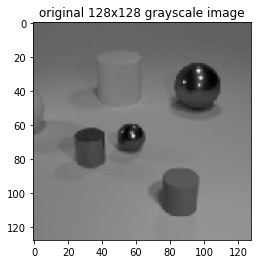

In [5]:
img = cv2.imread('CLEVR_sample.png', cv2.IMREAD_GRAYSCALE)
print('image size:', img.shape)
print('original type:', img.dtype)
img = np.float32(img)  # float conversion/scale
print('after conversion type:', img.dtype)
plt.imshow(img, cmap='gray')
plt.title("original 128x128 grayscale image")

Text(0.5, 1.0, '8x8 DCTs of the image')

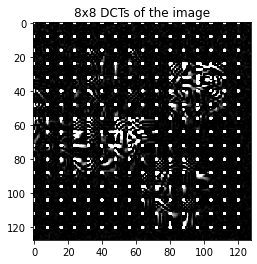

In [6]:
dct_img = np.zeros_like(img)
# Do 8x8 DCT on image (in-place)
for i in range(0, dct_img.shape[0], 8):
    for j in range(0, dct_img.shape[1], 8):
        dct_img[i:(i+8),j:(j+8)] = DCT_2D( img[i:(i+8),j:(j+8)] )
plt.figure()
plt.imshow(dct_img, cmap='gray', vmax=np.max(dct_img)*0.01,vmin=0)
plt.title("8x8 DCTs of the image")

### 3. Threshold DCT coefficients

Text(0.5, 1.0, 'Thresholded 8x8 DCTs of the image')

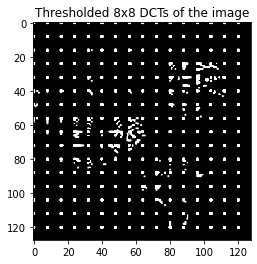

In [7]:
# Threshold
threshold = 0.012
dct_thresh = dct_img * (abs(dct_img) > (threshold*np.max(dct_img)))
plt.figure()
plt.imshow(dct_thresh, cmap='gray', vmax=np.max(dct_thresh)*0.01,vmin=0)
plt.title("Thresholded 8x8 DCTs of the image")

### 4. Calculate how many DCT coefficients are kept

In [8]:
percent_nonzeros = np.array(dct_thresh!= 0.0).sum() / (img.shape[0]*img.shape[1]*1.0)
print ("Keeping only", percent_nonzeros*100.0, "% of the DCT coefficients")

Keeping only 5.419921875 % of the DCT coefficients


### 5. Calculate MSE distortion

MSE_error 5.997094


Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

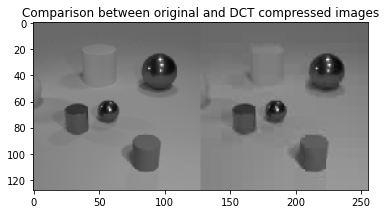

In [9]:
inverse_dct_thres_img = np.zeros_like(dct_thresh)
for i in range(0, dct_thresh.shape[0], 8):
    for j in range(0, dct_thresh.shape[1], 8):
        inverse_dct_thres_img[i:(i+8),j:(j+8)] = IDCT_2D(dct_thresh[i:(i+8),j:(j+8)] )

MSE_error = ((inverse_dct_thres_img - img)**2).mean()
print('MSE_error', MSE_error)
plt.figure()
plt.imshow(inverse_dct_thres_img, cmap='gray')
plt.imshow(np.hstack((img, inverse_dct_thres_img)),cmap='gray')
plt.title("Comparison between original and DCT compressed images" )